# Cereal Dataset
## Numpy and Pandas Notebook

In this exercise you will use a dataset containing information about different cereals in order to further your knowledge of NumPy and Pandas.  Before expanding our knowledge we will first review some data exploration basics.

First, download the notebook and the .csv file `cereal.csv` and place them in the same folder.

In this notebook, you will be asked to first practice some basic NumPy and Pandas skills. Practice is extremely important in building your manipulation skills so you should attempt to complete the task yourself before watching the solution.

Also note that there are sometimes different ways to do the same thing when using Python, NumPy, and Pandas for data manipulation. Some ways are more efficient than others, especially with larger data sets, but since these datasets are so small, the suggested solutions may not be the most efficient. Instead, our goal is to show you different options when it comes to completing the tasks.

The complete dataset can be found here: [Kaggle](https://www.kaggle.com/crawford/80-cereals)

|Variable | Description|
|:--------|:-----------|
|Name| Name of cereal
|mfr| Manufacturer of cereal|
|type| hot or cold|   
|calories| calories per serving|
|protein| grams of protein|
|fat| grams of fat|
|sodium| milligrams of sodium|
|fiber| grams of dietary fiber|
|carbo| grams of complex carbohydrates|
|sugars| grams of sugars|
|potass| milligrams of potassium|
|vitamins| vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended|
|shelf| display shelf (1, 2, or 3, counting from the floor)|
|weight| weight in ounces of one serving|
|cups| number of cups in one serving|
|rating| a rating of the cereals (Possibly from Consumer Reports?)|

# Exploration

### Initial Imports

In [1]:
# import common libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
# load data from csv

data = pd.read_csv('cereal.csv', index_col = 'name') #ensure file is in same location as notebook or add path

First look at `cereal`

In [3]:
# head

data.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
# shape

data.shape

(77, 15)

77 observations, 15 variables

Now lets see what the columns are named:

In [5]:
# columns

for i in data.columns:
    print(i)

mfr
type
calories
protein
fat
sodium
fiber
carbo
sugars
potass
vitamins
shelf
weight
cups
rating


There are several ways to get a quick view of your data:

* the `head()` method (seen above) provides a quick look at the first several rows of your data
* the `info()` method provides a brief summary of your DataFrame including non-null count and data types
* the `describe()` method provides descriptive statistics of numerical data 

In [6]:
# info

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 100% Bran to Wheaties Honey Gold
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mfr       77 non-null     object 
 1   type      77 non-null     object 
 2   calories  77 non-null     int64  
 3   protein   77 non-null     int64  
 4   fat       77 non-null     int64  
 5   sodium    77 non-null     int64  
 6   fiber     77 non-null     float64
 7   carbo     77 non-null     float64
 8   sugars    77 non-null     int64  
 9   potass    77 non-null     int64  
 10  vitamins  77 non-null     int64  
 11  shelf     77 non-null     int64  
 12  weight    77 non-null     float64
 13  cups      77 non-null     float64
 14  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(2)
memory usage: 9.6+ KB


In [7]:
# describe

data.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [8]:
# number of observations

len(data)

77

In [9]:
# descriptives for calories

data.calories.describe()

count     77.000000
mean     106.883117
std       19.484119
min       50.000000
25%      100.000000
50%      110.000000
75%      110.000000
max      160.000000
Name: calories, dtype: float64

We can view unique values using `unique()` and identify the counts using `value_counts()`

Let's look at manufacturer 

In [10]:
# unique manufacturers

data.mfr.unique()

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

In [11]:
# manufacturer value counts

data.mfr.value_counts()

K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: mfr, dtype: int64

In [12]:
# pivot table for calories by manufacturer

data.pivot_table('calories', 'mfr')

,calories
mfr,
A,100.000000
G,111.363636
K,108.695652
N,86.666667
P,108.888889
Q,95.000000
R,115.000000


In [13]:
# pivot table for calories by manufacturer by type

data.pivot_table('calories', 'mfr', 'type')

type,C,H
mfr,,
A,NaN,100.0
G,111.363636,NaN
K,108.695652,NaN
N,84.000000,100.0
P,108.888889,NaN
Q,94.285714,100.0
R,115.000000,NaN


# Selecting columns

We're interested in calories, manufacturer, cups, rating, and cost (which doesn't yet exist)

In [14]:
# select variables of interest - including cost

data2 = pd.DataFrame(data, columns = ['calories', 'mfr', 'cups', 'rating', 'cost'])
data2

,calories,mfr,cups,rating,cost
name,,,,,
100% Bran,70,N,0.33,68.402973,NaN
100% Natural Bran,120,Q,1.00,33.983679,NaN
All-Bran,70,K,0.33,59.425505,NaN
All-Bran with Extra Fiber,50,K,0.50,93.704912,NaN
Almond Delight,110,R,0.75,34.384843,NaN
...,...,...,...,...,...
Triples,110,G,0.75,39.106174,NaN
Trix,110,G,1.00,27.753301,NaN
Wheat Chex,100,R,0.67,49.787445,NaN


Notice `cost` = NaN because it didn't exist before selecting it

In [15]:
# this doesn't work (not including cost)

data['calories', 'mfr', 'cups', 'rating']

KeyError: ('calories', 'mfr', 'cups', 'rating')

In [16]:
# select multiple variables - but not cost

data[['calories', 'mfr', 'cups', 'rating']]

,calories,mfr,cups,rating
name,,,,
100% Bran,70,N,0.33,68.402973
100% Natural Bran,120,Q,1.00,33.983679
All-Bran,70,K,0.33,59.425505
All-Bran with Extra Fiber,50,K,0.50,93.704912
Almond Delight,110,R,0.75,34.384843
...,...,...,...,...
Triples,110,G,0.75,39.106174
Trix,110,G,1.00,27.753301
Wheat Chex,100,R,0.67,49.787445


In [17]:
# this doesn't work, either

data[['calories', 'mfr', 'cups', 'rating', 'cost']]

KeyError: "['cost'] not in index"

In [18]:
# set cost to $3.50

data2['cost'] = 3.5
data2

,calories,mfr,cups,rating,cost
name,,,,,
100% Bran,70,N,0.33,68.402973,3.5
100% Natural Bran,120,Q,1.00,33.983679,3.5
All-Bran,70,K,0.33,59.425505,3.5
All-Bran with Extra Fiber,50,K,0.50,93.704912,3.5
Almond Delight,110,R,0.75,34.384843,3.5
...,...,...,...,...,...
Triples,110,G,0.75,39.106174,3.5
Trix,110,G,1.00,27.753301,3.5
Wheat Chex,100,R,0.67,49.787445,3.5


In [19]:
# create random values for cost

np.random.seed(56)

costs = np.random.uniform(low = 2.5, high = 4.5, size = (len(data2))).round(2)

data2['cost'] = costs
data2

,calories,mfr,cups,rating,cost
name,,,,,
100% Bran,70,N,0.33,68.402973,4.47
100% Natural Bran,120,Q,1.00,33.983679,3.17
All-Bran,70,K,0.33,59.425505,3.85
All-Bran with Extra Fiber,50,K,0.50,93.704912,2.89
Almond Delight,110,R,0.75,34.384843,3.21
...,...,...,...,...,...
Triples,110,G,0.75,39.106174,3.37
Trix,110,G,1.00,27.753301,3.31
Wheat Chex,100,R,0.67,49.787445,3.17


In [20]:
# when assigning values, they must be the correct size
# notice here we have 78 values, not 77, which will cause an error

np.random.seed(56)

costs2 = np.random.uniform(low = 2.5, high = 4.5, size = (78)).round(2)
data2['cost'] = costs2

data2

ValueError: Length of values does not match length of index

Now we want identify only those with values greater than 3.50m

In [21]:
# create new boolean where costs > 3.5

data2['cost2'] = data2['cost'] > 3.5

data2

,calories,mfr,cups,rating,cost,cost2
name,,,,,,
100% Bran,70,N,0.33,68.402973,4.47,True
100% Natural Bran,120,Q,1.00,33.983679,3.17,False
All-Bran,70,K,0.33,59.425505,3.85,True
All-Bran with Extra Fiber,50,K,0.50,93.704912,2.89,False
Almond Delight,110,R,0.75,34.384843,3.21,False
...,...,...,...,...,...,...
Triples,110,G,0.75,39.106174,3.37,False
Trix,110,G,1.00,27.753301,3.31,False
Wheat Chex,100,R,0.67,49.787445,3.17,False


In [22]:
# let's use `del` to delete `cost2` - we don't need it

del data2['cost2']
data2

,calories,mfr,cups,rating,cost
name,,,,,
100% Bran,70,N,0.33,68.402973,4.47
100% Natural Bran,120,Q,1.00,33.983679,3.17
All-Bran,70,K,0.33,59.425505,3.85
All-Bran with Extra Fiber,50,K,0.50,93.704912,2.89
Almond Delight,110,R,0.75,34.384843,3.21
...,...,...,...,...,...
Triples,110,G,0.75,39.106174,3.37
Trix,110,G,1.00,27.753301,3.31
Wheat Chex,100,R,0.67,49.787445,3.17


In [23]:
# we can index our original dataset using this value, as well

data3 = data2[data2['cost']>3.5]

data3.head()

,calories,mfr,cups,rating,cost
name,,,,,
100% Bran,70,N,0.33,68.402973,4.47
All-Bran,70,K,0.33,59.425505,3.85
Apple Cinnamon Cheerios,110,G,0.75,29.509541,4.13
Bran Chex,90,R,0.67,49.120253,4.25
Cinnamon Toast Crunch,120,G,0.75,19.823573,4.17


In [24]:
print(data2['cost']>3.5)

name
100% Bran                     True
100% Natural Bran            False
All-Bran                      True
All-Bran with Extra Fiber    False
Almond Delight               False
                             ...  
Triples                      False
Trix                         False
Wheat Chex                   False
Wheaties                     False
Wheaties Honey Gold          False
Name: cost, Length: 77, dtype: bool


### Selecting rows

As with selecting columns, there are frequently multiple ways to accomplish tasks

To select observations we can use `.loc` and `.iloc`

`.loc` = axis labels

`.iloc` = integers

In [25]:
data.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [26]:
data.loc['All-Bran']

mfr               K
type              C
calories         70
protein           4
fat               1
sodium          260
fiber             9
carbo             7
sugars            5
potass          320
vitamins         25
shelf             3
weight            1
cups           0.33
rating      59.4255
Name: All-Bran, dtype: object

In [27]:
data.iloc[2]

mfr               K
type              C
calories         70
protein           4
fat               1
sodium          260
fiber             9
carbo             7
sugars            5
potass          320
vitamins         25
shelf             3
weight            1
cups           0.33
rating      59.4255
Name: All-Bran, dtype: object

We can select values by indicating the row(s) and column(s) we're interested in

In [28]:
data.loc['All-Bran', 'fiber']

9.0

In [29]:
# use brackets instead of parentheses as shown in module video to prevent later problems
data.loc[['All-Bran', 'Almond Delight'], 'fiber']

name
All-Bran          9.0
Almond Delight    1.0
Name: fiber, dtype: float64

In [30]:
# use brackets instead of parentheses as shown in module video to prevent later problems
data.loc[['All-Bran', 'Almond Delight'], ['fiber', 'mfr']]

,fiber,mfr
name,,
All-Bran,9.0,K
Almond Delight,1.0,R


# Reinforcement

#### Student Practice
Pause the video and try to perform the following tasks on the `cereal` dataset. Then check your answers as I walk through the solutions. 

**Exercise:** Select only the `protein` column from the data.

In [31]:
# select only variable protein

data[['protein']]

,protein
name,
100% Bran,4
100% Natural Bran,3
All-Bran,4
All-Bran with Extra Fiber,4
Almond Delight,2
...,...
Triples,2
Trix,1
Wheat Chex,3


**Exercise:** Select the `fat`, `calories`, and `sugars` columns from the data.

In [32]:
# select only variables fat, calories, sugars

data[['fat', 'calories', 'sugars']]

,fat,calories,sugars
name,,,
100% Bran,1,70,6
100% Natural Bran,5,120,8
All-Bran,1,70,5
All-Bran with Extra Fiber,0,50,0
Almond Delight,2,110,8
...,...,...,...
Triples,1,110,3
Trix,1,110,12
Wheat Chex,1,100,3


**Exercise:** Select the following observations from the data: `Cocoa Puffs`, `Frosted Flakes`, and `Fruity Pebbles`.

In [33]:
data.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [34]:
#now instead of selecting variables, select rows
# select observations Cocoa Puffs, Frosted Flakes, and Fruity Pebbles

data.loc[['Cocoa Puffs','Frosted Flakes', 'Fruity Pebbles'],:]

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
Cocoa Puffs,G,C,110,1,1,180,0.0,12.0,13,55,25,2,1.0,1.00,22.736446
Frosted Flakes,K,C,110,1,0,200,1.0,14.0,11,25,25,1,1.0,0.75,31.435973
Fruity Pebbles,P,C,110,1,1,135,0.0,13.0,12,25,25,2,1.0,0.75,28.025765


**Exercise:** Select the cereals that have `fiber` greater than 10.

In [35]:
# select variable fiber where values are greater than 10

data['fiber'][data['fiber'] > 10]

name
All-Bran with Extra Fiber    14.0
Name: fiber, dtype: float64

**Exercise:** Import the csv file called `myratings.csv` and save it as a DataFrame called `myratings`.

In [41]:
# import myratings.csv

myratings = pd.read_csv('myratings.csv')

**Exercise:** Output the `myratings` DataFrame.  How many rows of data do we have?  Can you figure out why we do not have 77 rows as we did in the original `cereal` data?

In [42]:
# what do we have?

myratings

,myrating
0,1
1,2
2,3
3,3
4,3
5,3
6,5
7,3
8,3
9,2


**Exercise:** Check [Pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) to determine what is the default for handling blank lines of data.  How could you change this to interpret blank lines as NaN values instead of skipping them?

Import the `myratings.csv` file again, saving it was `myratings`, but this time making sure that blank lines are treated as missing values.

In [44]:
# import myratings.csv
myratings = pd.read_csv('myratings.csv', skip_blank_lines=False)
myratings


,myrating
0,1.0
1,NaN
2,NaN
3,NaN
4,2.0
...,...
72,NaN
73,1.0
74,NaN
75,3.0


**Exercise:** Set the index of `myratings` as the same as the index of the `cereal` data (created as `data` above).

In [47]:
# set index to cereal name

myratings.set_index(data.index, inplace=True)
myratings

,myrating
name,
100% Bran,1.0
100% Natural Bran,NaN
All-Bran,NaN
All-Bran with Extra Fiber,NaN
Almond Delight,2.0
...,...
Triples,NaN
Trix,1.0
Wheat Chex,NaN


**Exercise:** How many missing values are represented in the `myratings` data?

In [53]:
# count missing values

myratings.isnull().sum()

myrating    45
dtype: int64

**Exercise:** Merge the `data` DataFrame and the `myratings` DataFrame.

In [58]:
new_df = data.merge(myratings, on='name')
new_df

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,myrating
name,,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,1.0
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,NaN
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,NaN
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,NaN
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,NaN
Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,1.0
Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,NaN


**Exercise:** The `myrating` attribute is on a scale of 1-5 while the rating attribute from the original data is on a scale of 0-100.  

Create a new column called `myrating20` that multiplies the `myrating` column by 20 so that is has the same scale as the original data.

In [59]:
# multiply myrating variable by 20

new_df['myrating20'] = new_df['myrating']*20
new_df

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,myrating,myrating20
name,,,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,1.0,20.0
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,NaN,NaN
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,NaN,NaN
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,NaN,NaN
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,2.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,NaN,NaN
Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,1.0,20.0
Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,NaN,NaN


**Exercise:** What is the difference between the original `rating` column and the `myrating20` column?  Create a new column called `diff` that subtracts the `myrating20` column from the `rating` column.

In [64]:
# calculate difference 

new_df['diff'] = new_df['rating'] - new_df['myrating20']
new_df

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,myrating,myrating20,diff
name,,,,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,1.0,20.0,48.402973
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,NaN,NaN,NaN
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,NaN,NaN,NaN
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,NaN,NaN,NaN
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,2.0,40.0,-5.615157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,NaN,NaN,NaN
Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,1.0,20.0,7.753301
Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,NaN,NaN,NaN


**Exercise:** Find the cereals with the five largest differences values.

In [70]:
# find five largest differences

#new_df[['diff']].sort_values(by='diff',ascending=False).head()

new_df.nlargest(5,['diff'])

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,myrating,myrating20,diff
name,,,,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973,1.0,20.0,48.402973
Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885,2.0,40.0,28.235885
Kix,G,C,110,2,1,260,0.0,21.0,3,40,25,2,1.00,1.50,39.241114,1.0,20.0,19.241114
Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.00,1.00,27.753301,1.0,20.0,7.753301
Corn Flakes,K,C,100,2,0,290,1.0,21.0,2,35,25,1,1.00,1.00,45.863324,2.0,40.0,5.863324


## Create per cup amounts

#### Student Practice
Pause the video and try to perform the following tasks on the `cereal` dataset. Then check your answers as I walk through the solutions. 

**Exercise:** Create four new variables called:

* `calPerCup` - calories per cup
* `proPerCup` - protein per cup
* `fatPerCup` - fat per cup
* `sugPerCup` - sugar per cup

All created by taking the variable and dividing by cups (e.g., calories/cups)

In [71]:
# create 'calPerCup', 'proPerCup', 'fatPerCup', 'sugPerCup' variables as ratio of variable to cups

new_df['calPerCup'] = new_df['calories']/new_df['cups']
new_df['proPerCup'] = new_df['protein']/new_df['cups']
new_df['fatPerCup'] = new_df['fat']/new_df['cups']
new_df['sugPerCup'] = new_df['sugars']/new_df['cups']

**Exercise:** Create a scatterplot of `calories` by `calPerCup`.  You can use Matplotlib or Seaborn.

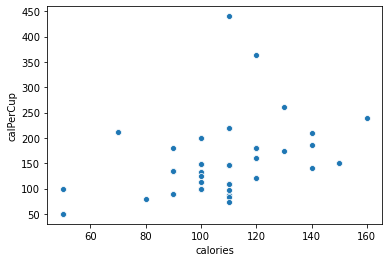

In [73]:
# create scatterplot for calories by calPerCup

sns.scatterplot(data=new_df, x='calories', y='calPerCup')

**Exercise:** Which cereal has the highest calories per cup?

In [74]:
# which cereal had the highest calories per cup?

new_df.nlargest(1,['calPerCup'])

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,...,weight,cups,rating,myrating,myrating20,diff,calPerCup,proPerCup,fatPerCup,sugPerCup
name,,,,,,,,,,,,,,,,,,,,,
Grape-Nuts,P,C,110,3,0,170,3.0,17.0,3,90,...,1.0,0.25,53.371007,NaN,NaN,NaN,440.0,12.0,0.0,12.0


## Sorting

**Exercise:** Sort `data` by index.

In [75]:
# sort index alphabetically

new_df.sort_index()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,...,weight,cups,rating,myrating,myrating20,diff,calPerCup,proPerCup,fatPerCup,sugPerCup
name,,,,,,,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,...,1.0,0.33,68.402973,1.0,20.0,48.402973,212.121212,12.121212,3.030303,18.181818
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,...,1.0,1.00,33.983679,NaN,NaN,NaN,120.000000,3.000000,5.000000,8.000000
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,...,1.0,0.33,59.425505,NaN,NaN,NaN,212.121212,12.121212,3.030303,15.151515
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,...,1.0,0.50,93.704912,NaN,NaN,NaN,100.000000,8.000000,0.000000,0.000000
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,...,1.0,0.75,34.384843,2.0,40.0,-5.615157,146.666667,2.666667,2.666667,10.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Triples,G,C,110,2,1,250,0.0,21.0,3,60,...,1.0,0.75,39.106174,NaN,NaN,NaN,146.666667,2.666667,1.333333,4.000000
Trix,G,C,110,1,1,140,0.0,13.0,12,25,...,1.0,1.00,27.753301,1.0,20.0,7.753301,110.000000,1.000000,1.000000,12.000000
Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,...,1.0,0.67,49.787445,NaN,NaN,NaN,149.253731,4.477612,1.492537,4.477612


**Exercise:** Sort the columns alphabetically.

In [76]:
# sort columns

new_df.sort_index(axis=1)

,calPerCup,calories,carbo,cups,diff,fat,fatPerCup,fiber,mfr,myrating,...,proPerCup,protein,rating,shelf,sodium,sugPerCup,sugars,type,vitamins,weight
name,,,,,,,,,,,,,,,,,,,,,
100% Bran,212.121212,70,5.0,0.33,48.402973,1,3.030303,10.0,N,1.0,...,12.121212,4,68.402973,3,130,18.181818,6,C,25,1.0
100% Natural Bran,120.000000,120,8.0,1.00,NaN,5,5.000000,2.0,Q,NaN,...,3.000000,3,33.983679,3,15,8.000000,8,C,0,1.0
All-Bran,212.121212,70,7.0,0.33,NaN,1,3.030303,9.0,K,NaN,...,12.121212,4,59.425505,3,260,15.151515,5,C,25,1.0
All-Bran with Extra Fiber,100.000000,50,8.0,0.50,NaN,0,0.000000,14.0,K,NaN,...,8.000000,4,93.704912,3,140,0.000000,0,C,25,1.0
Almond Delight,146.666667,110,14.0,0.75,-5.615157,2,2.666667,1.0,R,2.0,...,2.666667,2,34.384843,3,200,10.666667,8,C,25,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Triples,146.666667,110,21.0,0.75,NaN,1,1.333333,0.0,G,NaN,...,2.666667,2,39.106174,3,250,4.000000,3,C,25,1.0
Trix,110.000000,110,13.0,1.00,7.753301,1,1.000000,0.0,G,1.0,...,1.000000,1,27.753301,2,140,12.000000,12,C,25,1.0
Wheat Chex,149.253731,100,17.0,0.67,NaN,1,1.492537,3.0,R,NaN,...,4.477612,3,49.787445,1,230,4.477612,3,C,25,1.0


**Exercise:** Sort the columns in descending order alphabetically.

In [77]:
# sort in descending order

new_df.sort_index(axis=1,ascending=False)

,weight,vitamins,type,sugars,sugPerCup,sodium,shelf,rating,protein,proPerCup,...,myrating,mfr,fiber,fatPerCup,fat,diff,cups,carbo,calories,calPerCup
name,,,,,,,,,,,,,,,,,,,,,
100% Bran,1.0,25,C,6,18.181818,130,3,68.402973,4,12.121212,...,1.0,N,10.0,3.030303,1,48.402973,0.33,5.0,70,212.121212
100% Natural Bran,1.0,0,C,8,8.000000,15,3,33.983679,3,3.000000,...,NaN,Q,2.0,5.000000,5,NaN,1.00,8.0,120,120.000000
All-Bran,1.0,25,C,5,15.151515,260,3,59.425505,4,12.121212,...,NaN,K,9.0,3.030303,1,NaN,0.33,7.0,70,212.121212
All-Bran with Extra Fiber,1.0,25,C,0,0.000000,140,3,93.704912,4,8.000000,...,NaN,K,14.0,0.000000,0,NaN,0.50,8.0,50,100.000000
Almond Delight,1.0,25,C,8,10.666667,200,3,34.384843,2,2.666667,...,2.0,R,1.0,2.666667,2,-5.615157,0.75,14.0,110,146.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Triples,1.0,25,C,3,4.000000,250,3,39.106174,2,2.666667,...,NaN,G,0.0,1.333333,1,NaN,0.75,21.0,110,146.666667
Trix,1.0,25,C,12,12.000000,140,2,27.753301,1,1.000000,...,1.0,G,0.0,1.000000,1,7.753301,1.00,13.0,110,110.000000
Wheat Chex,1.0,25,C,3,4.477612,230,1,49.787445,3,4.477612,...,NaN,R,3.0,1.492537,1,NaN,0.67,17.0,100,149.253731


**Exercise:** Sort the data by the `calories` column.

In [84]:
# sort by different columns

new_df['calories'].sort_values()

name
All-Bran with Extra Fiber             50
Puffed Rice                           50
Puffed Wheat                          50
100% Bran                             70
All-Bran                              70
                                    ... 
Nutri-Grain Almond-Raisin            140
Just Right Fruit & Nut               140
Muesli Raisins; Dates; & Almonds     150
Muesli Raisins; Peaches; & Pecans    150
Mueslix Crispy Blend                 160
Name: calories, Length: 77, dtype: int64

**Exercise:** Sort the data by `calories` and then `mfr`.

In [88]:
# sort by multiple columns

new_df.sort_values(by=['calories', 'mfr'])
#first sorting by calories, then the secondary sort is manufactuer. so if there is a tie for calories ex. 50,50,50, then sort by mfr in alphabeltical order 

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,...,weight,cups,rating,myrating,myrating20,diff,calPerCup,proPerCup,fatPerCup,sugPerCup
name,,,,,,,,,,,,,,,,,,,,,
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,...,1.00,0.50,93.704912,NaN,NaN,NaN,100.000000,8.000000,0.000000,0.000000
Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0,15,...,0.50,1.00,60.756112,NaN,NaN,NaN,50.000000,1.000000,0.000000,0.000000
Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,...,0.50,1.00,63.005645,NaN,NaN,NaN,50.000000,2.000000,0.000000,0.000000
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,...,1.00,0.33,59.425505,NaN,NaN,NaN,212.121212,12.121212,3.030303,15.151515
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,...,1.00,0.33,68.402973,1.0,20.0,48.402973,212.121212,12.121212,3.030303,18.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Just Right Fruit & Nut,K,C,140,3,1,170,2.0,20.0,9,95,...,1.30,0.75,36.471512,NaN,NaN,NaN,186.666667,4.000000,1.333333,12.000000
Nutri-Grain Almond-Raisin,K,C,140,3,2,220,3.0,21.0,7,130,...,1.33,0.67,40.692320,NaN,NaN,NaN,208.955224,4.477612,2.985075,10.447761
Muesli Raisins; Dates; & Almonds,R,C,150,4,3,95,3.0,16.0,11,170,...,1.00,1.00,37.136863,NaN,NaN,NaN,150.000000,4.000000,3.000000,11.000000


## Descriptive stats

Many descriptive stats are available quickly - although you should be careful 

**Exercise:** Sum the entire data by column.

In [89]:
# sum for all variables

new_df.sum()

mfr           NQKKRGKGRPQGGGGRKKGKNKGRKKKPKPPGPPPQGPKKGQGARR...
type          CCCCCCCCCCCCCCCCCCCCHCCCCCCCCCCCCCCCCCCCCCCHCC...
calories                                                   8230
protein                                                     196
fat                                                          78
sodium                                                    12295
fiber                                                     165.7
carbo                                                      1124
sugars                                                      533
potass                                                     7398
vitamins                                                   2175
shelf                                                       170
weight                                                    79.28
cups                                                      63.22
rating                                                  3285.26
myrating                                

**Exercise:** Sum the `calories` column only.

In [90]:
# sum of calories

new_df['calories'].sum()

8230

**Exercise:** Calculate the standard deviation by column.

In [91]:
# std for all variables

new_df.std()

calories      19.484119
protein        1.094790
fat            1.006473
sodium        83.832295
fiber          2.383364
carbo          4.278956
sugars         4.444885
potass        71.286813
vitamins      22.342523
shelf          0.832524
weight         0.150477
cups           0.232716
rating        14.047289
myrating       1.221035
myrating20    24.420708
diff          30.398210
calPerCup     60.224368
proPerCup      2.499900
fatPerCup      1.645827
sugPerCup      5.985441
dtype: float64

**Exercise:** Calculate the standard deviation for the `calories` column.

In [92]:
# std of calories

new_df['calories'].std()

19.48411905682084

**Exercise:** Sum all variables by observation.  Note that the information here is for illustrative purposes only and the output is not useful.

In [97]:
# sum by observation
# the output here is non useful - only for illustrative purposes

new_df.sum(axis=1)
#just adding everything from left to right (adding values in each row)

name
100% Bran                     918.590491
100% Natural Bran             470.983679
All-Bran                     1007.179747
All-Bran with Extra Fiber     777.204912
Almond Delight                599.186353
                                ...     
Triples                       670.522841
Trix                          511.506602
Wheat Chex                    709.158938
Wheaties                      678.184386
Wheaties Honey Gold           661.458451
Length: 77, dtype: float64

Some methods are not direct stats - but use them

**Exercise:**  What is the index value of the cereal that has the maximum calories?

In [119]:
# identify index value of maximum for calories

new_df[['calories']].idxmax()

calories    Mueslix Crispy Blend
dtype: object

**Exercise:** What is the index value of the cereal that has the minimum calories?

In [120]:
# identify index value of minimum for calories

new_df[['calories']].idxmin()

calories    All-Bran with Extra Fiber
dtype: object

Correlation and covariance work well with DataFrames

**Exercise:** What is the correlation for all numeric variables in the data?

In [122]:
# correlation for all numeric variables in the df

new_df.corr()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,myrating,myrating20,diff,calPerCup,proPerCup,fatPerCup,sugPerCup
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376,0.515270,0.515270,-0.722729,0.337821,-0.147650,0.351844,0.454931
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618,0.122558,0.122558,0.155343,0.220932,0.698604,0.228848,-0.152155
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284,0.270226,0.270226,-0.344286,0.334962,0.167308,0.873212,0.330257
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295,0.012588,0.012588,-0.142200,0.031868,-0.081261,-0.039145,0.093967
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160,0.046744,0.046744,0.192644,0.256096,0.674040,0.145162,0.095049
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055,-0.135352,-0.135352,0.122348,-0.137202,-0.330238,-0.366640,-0.420701
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675,0.303967,0.303967,-0.541732,0.161480,-0.237608,0.179369,0.865105
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.380165,0.242193,0.242193,-0.045759,0.318346,0.652837,0.265298,0.245860
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,0.299262,0.320324,0.128405,-0.240544,0.303953,0.303953,-0.373986,-0.003091,-0.074182,-0.057393,0.060221
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.360663,0.299262,1.000000,0.190762,-0.335269,0.025159,0.199229,0.199229,-0.197677,0.358350,0.316951,0.317631,0.275862


**Exercise:** What is the covariance for all numeric variables in the data?

In [123]:
# covariance for all numeric variables in the df

new_df.cov()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,myrating,myrating20,diff,calPerCup,proPerCup,fatPerCup,sugPerCup
calories,379.630895,0.406699,9.777854,491.079973,-13.625427,20.899692,48.701299,-92.517088,115.516063,1.577239,2.040875,0.395386,-188.681562,7.399194,147.983871,-258.371533,396.405602,-7.191800,11.282749,53.054578
protein,0.406699,1.198565,0.229665,-5.017943,1.305502,-0.613038,-1.601675,42.877990,0.179426,0.122010,0.035610,-0.062285,7.237560,0.204637,4.092742,6.457373,14.566694,1.911985,0.412347,-0.997044
fat,9.777854,0.229665,1.012987,-0.456254,0.040106,-1.369703,1.211552,13.867396,-0.700615,0.220950,0.032505,-0.041198,-5.786539,0.290323,5.806452,-9.208579,20.303437,0.420961,1.446458,1.989531
sodium,491.079973,-5.017943,-0.456254,7027.853725,-14.121070,127.696514,37.803315,-194.842789,677.054853,-4.865858,3.892635,2.334552,-472.571837,1.199597,23.991935,-337.359011,160.891632,-17.030002,-5.400992,47.150042
fiber,-13.625427,1.305502,0.040106,-14.121070,5.680424,-3.631442,-1.495899,153.485373,-1.716934,0.590379,0.088665,-0.284568,19.557575,0.123488,2.469758,12.669954,36.759167,4.016044,0.569414,1.355922
carbo,20.899692,-0.613038,-1.369703,127.696514,-3.631442,18.309467,-6.308100,-106.665584,24.679597,-0.362611,0.087012,0.362397,3.128888,-0.781250,-15.625000,17.581024,-35.356697,-3.532545,-2.582036,-10.774766
sugars,48.701299,-1.601675,1.211552,37.803315,-1.495899,-6.308100,19.757006,6.874573,12.427375,0.371668,0.301417,-0.033471,-47.433013,1.717742,34.354839,-76.214235,43.226566,-2.640248,1.312178,23.015773
potass,-92.517088,42.877990,13.867396,-194.842789,153.485373,-106.665584,6.874573,5081.809638,32.967362,21.404648,4.465689,-8.215082,380.692445,22.013105,440.262097,-103.541527,1366.725837,116.342017,31.126259,104.904154
vitamins,115.516063,0.179426,-0.700615,677.054853,-1.716934,24.679597,12.427375,32.967362,499.188312,5.566473,1.076940,0.667635,-75.495061,5.519153,110.383065,-169.060182,-4.159586,-4.143372,-2.110467,8.053386
shelf,1.577239,0.122010,0.220950,-4.865858,0.590379,-0.362611,0.371668,21.404648,5.566473,0.693096,0.023898,-0.064956,0.294225,0.186492,3.729839,-4.606632,17.967042,0.659648,0.435214,1.374628
